# TensorFlow Basics and Model Training

## Introduction

TensorFlow (TF) is a numerical processing library that is widely used by machine learning and deep learning researchers or practitioners. TF is used for training and running deep neural networks. This project aims to cover the introduction of TF version 1.x and 2.0.

## Breakdown of this Notebook:
- Introduction to TensorFlow 2 and Keras packages
- Creating and Training a simple Computer Vision (CV) model.
- Tensorflow and Keras core concepts
- The TensorFlow ecosystem.

## Dataset:

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits dataset contains 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## Requirements:
1. TensorFlow 2.0
2. If running on GPU, requires the CUDA enabled "tensorflow-gpu"


## For AMD GPU: 
See https://plaidml.github.io/plaidml/docs/install to use it as the Backend for Keras.

In [10]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## 1 - Introduction to TensorFlow 2 and Keras:

This section will briefly cover the framework and provides a basic example.

## 1.1 - TensorFlow Introduction:

TF can be described as a means of deployment of Machine Learning (ML) solutions on different types of platforms such as Computer CPUs or GPUs, Mobile devices and Browsers. It also presents with the capability of being scaled up for a larger distributed computer systems. 

## 1.2 - TF Architecture:

The architecture presents with several levels of abstraction and this can be seen in the following diagram.

In [1]:
import os
from IPython.display import Image

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

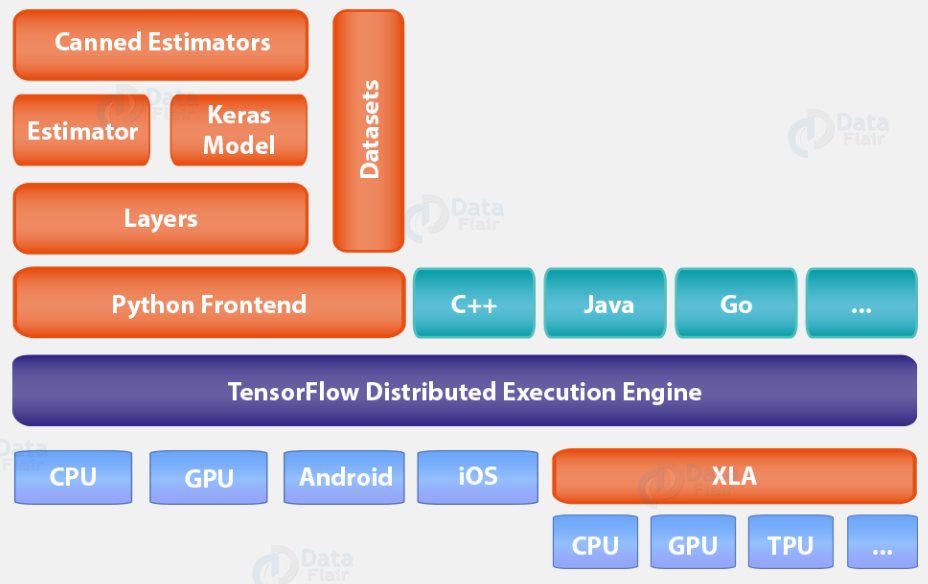

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [2]:
# TF Architecture: 
display(Image(image_path + 'TF Architecture.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

### The above diagram can be simplified into the following:

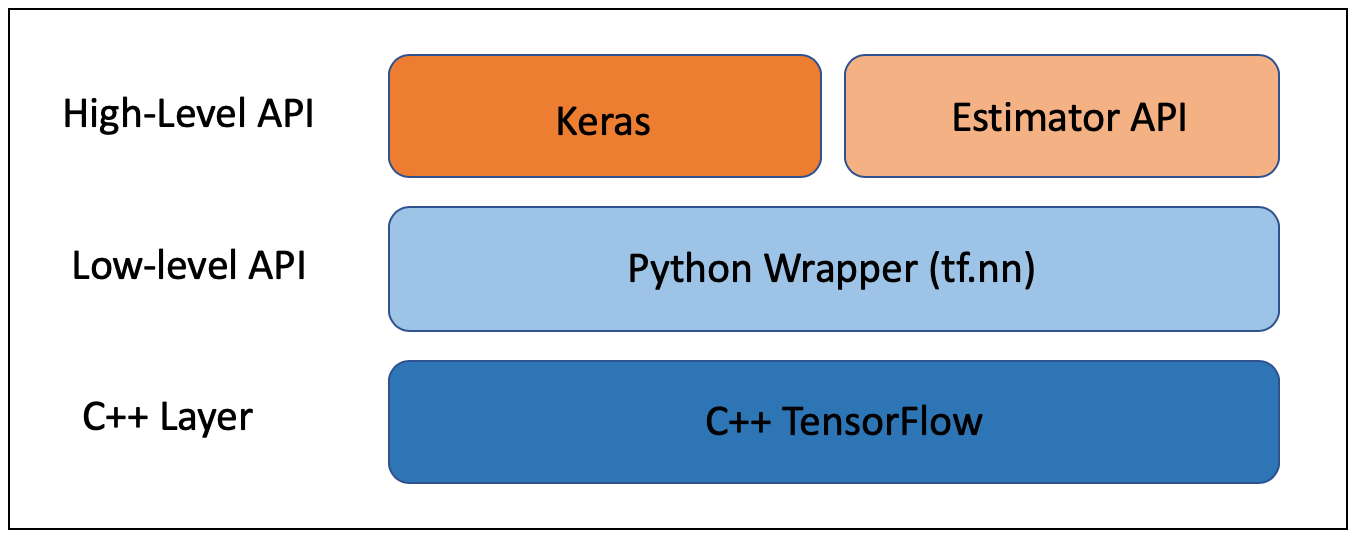

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [3]:
# TF Architecture Simplified: 
display(Image(image_path + 'TF Architecture Simplified.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

From the diagram, the lowest level begins with the C++ layer, then the next level being the Low-Level API Python Wrapper and lastly the High-Level API Keras and Estimator API.

### For the C++ layer:

These computations are originally coded in C++ language. Further, to perform these operations on a GPU equiped system, TF utilises the CUDA library developed by NVIDIA. 

### For the Python Wrapper Layer:

At this level, a Python low-level API is used to wrap the C++ sources, so that when a Python method is called in TF, it will invoke the C++ code behind the scenes. THis allows for users to code with Python rather the more complex C++ language. Python also does not require any compilation.

### For the Keras and Estimator API:

At this level, there are two components that are the Keras and Estimator API. Firstly, Keras can be described as a user-friendly, modular style, and extensible wrapper for TF itself. Secondly, the Estimator API has pre-made components that streamlines the building of machine learning models. These can be considered as building blocks or rather, templates.

## 2.1 - Keras Introduction:

Keras is an interface to allow for quick experimentation of Neural Networks (NN). It relies on TF and Theano frameworks to perform and run deep learning operations. Keras is great for beginners due to its user friendliness.

### NOTE: 

In this project, the standalone version of Keras will not be used, where instead the implementation are done with "tf.keras". This is to better integrate and be more compatible with TF's other modules and the methods of saving models made. 

## 2.2 - Building a Simple CV model with Keras:

The dataset used here is the MNIST Digits. It is made of 60,000 images to be used for training and 10,000 images to be used as the testing set.


## 2.2.1 - Import the required Libraries:

In [4]:
import tensorflow as tf

## 2.2.2 - Load in the Dataset:

In [5]:
# Define the number of classes:
nb_classes = 10

# Define the sizes of each images:
img_rows, img_cols = 28, 28

# Define the colour channels: greyscale = 1/
nb_channels = 1

# Define the input shape of each image:
input_shape = (img_rows, img_cols, nb_channels)


# Load the Dataset:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise the data:
x_train, x_test = x_train / 255.0 , x_test / 255.0

11493376/11490434 [==============================] - 5s 0us/step


## 2.2.3 - Building the Model:

Here, the model will be constructed with a simple architecture consisting of 2 Fully connected (Dense) layers, where one for the hidden layer and another for the ouput layer.

### Model in detail:

1. __Flatten__ - It takes in the 2D matrix that represents the image pixels and flattens it into a 1D array. Changing it from a 28 x 28 format to a 784 sized vector (28 x 28 = 784). 
2. __1st Dense__ - This will convert the 784 pixel values into 128 activations by multiplying the weight matrix (sized at 128, so the operation is 128 x 784) and by adding the bias matrix (sized at 128). This should output 100,480 parameters.
3. __2nd Dense__ - This will convert the 128 activations of the hidden layer into the final prediction wanted. It will output it as probabilities as the Softmax function is called ass the activation function.

In [6]:
# Instantiate the model:
model = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

## 2.2.4 - Training the Model:

It can be seen below, that the "compile()" method hass a few arguments:
1. optimizer - set to perform the gradient descent algorithm.
2. loss - set to be cross-entropy function to compute the loss.
3. metrics - return the evaluation metric that is accuracy.

The "fit()" method will fit/train the model on the training dataset. Here it is set to 5 epochs to iterate the whole dataset five times. Verbose is set to 1 to return the progress bar or ETA.

### NOTE:

The "sparse_categorical_crossentropy" set below is the same as "categorical_crossentropy", however it directly takes in the ground truth labels as its inputs, whereas  categorical_crossentropy requires a one-hot encoded labels.

In [8]:
# Compile the model:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model.fit(
    x= x_train,
    y= y_train,
    epochs= 5,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6397 - acc: 0.8403 - val_loss: 0.3568 - val_acc: 0.9043
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3397 - acc: 0.9046 - val_loss: 0.2949 - val_acc: 0.9171
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2913 - acc: 0.9176 - val_loss: 0.2605 - val_acc: 0.9261
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2611 - acc: 0.9259 - val_loss: 0.2378 - val_acc: 0.9319
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2379 - acc: 0.9329 - val_loss: 0.2221 - val_acc: 0.9366


### Observation - Model's Performance:

As it can be seen, only after 5 epochs, the model is able to obtain an accuracy score of 93.29% and a alidation accuracy of 93.66%. 

## 2.2.5 - Longer training time:

Lets experiment to see if increasing the number of epochs can improve the performance.

In [11]:
# Instantiate the model:
model2 = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model2.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model2.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model2.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

In [13]:
# Compile the model:
model2.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model2.fit(
    x= x_train,
    y= y_train,
    epochs= 10,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6389 - acc: 0.8401 - val_loss: 0.3544 - val_acc: 0.9051
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3342 - acc: 0.9064 - val_loss: 0.2919 - val_acc: 0.9181
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2864 - acc: 0.9203 - val_loss: 0.2587 - val_acc: 0.9283
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2564 - acc: 0.9281 - val_loss: 0.2346 - val_acc: 0.9341
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2336 - acc: 0.9348 - val_loss: 0.2174 - val_acc: 0.9373
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2150 - acc: 0.9400 - val_loss: 0.2045 - val_acc: 0.9420
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1994 - acc: 0.9443 - val_loss: 0.

### Observation - Model's Performance:

As it can be seen, only after 10 epochs, the model is able to obtain an accuracy score of 95.40% and a alidation accuracy of 95.37%. This is much better than previously seen. Perhaps increasing the epochs further would achieve a better score. 

## 3 - TensorFlow 2 and Keras:

